In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

## Input data

In [5]:
week_3_grades = pd.read_csv("/Users/shobanasiranjeevilu/Downloads/sample_work/sample_work/training_data/assignment_3_grades.csv")

In [6]:
week_5_grades = pd.read_csv("/Users/shobanasiranjeevilu/Downloads/sample_work/sample_work/training_data/lecture_5_assignment_grade.csv")

In [7]:
final_dataset = pd.concat([week_3_grades,week_5_grades])

In [8]:
final_dataset.sample(10)

,User,Username,Value,Feedback to Learner
12,Sunil Kumar Medara,smedara1,60.0,Code is not executable.Add notebook with exec...
18,Harika Tamma,ci75173,100.0,Nice Work
5,Bhaswanth Indrakanti,sb51893,100.0,Nice Work
11,Jaya Rupesh Maram,jmaram1,90.0,second question has to group by date-month an...
11,Afzal Mohammed Thupakula,afzalmt1,100.0,Nice work
14,Ramakanth Madira,gx82934,100.0,Nice work
1,Lahari Bandaru,up66259,70.0,"Question 1 is not executable, Question 3 is wrong"
13,Somasekhar Naganandi,tr41179,100.0,Nice Work
5,Nagasri Sai Kiran Anne,nagasra1,80.0,Assignment clearly stated to write spark code ...
2,Sunil Kumar Medara,smedara1,80.0,Assignment clearly stated to write spark code ...


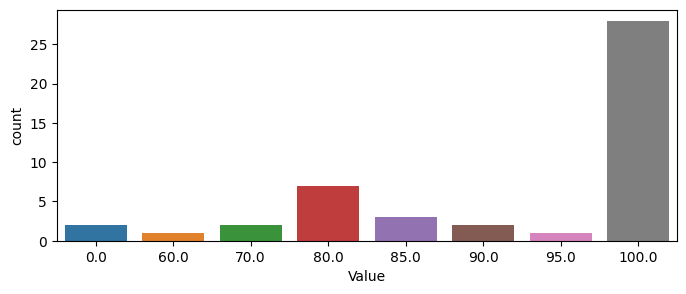

In [9]:
# taking count plot
plt.figure(figsize=(8, 3))
palette = sns.color_palette("pastel")
sns.countplot(final_dataset, x='Value');
plt.show()

## Fine-tuning analysis

In [10]:
metrices = pd.read_csv("/Users/shobanasiranjeevilu/Downloads/sample_work/sample_work/step_metrics.csv")

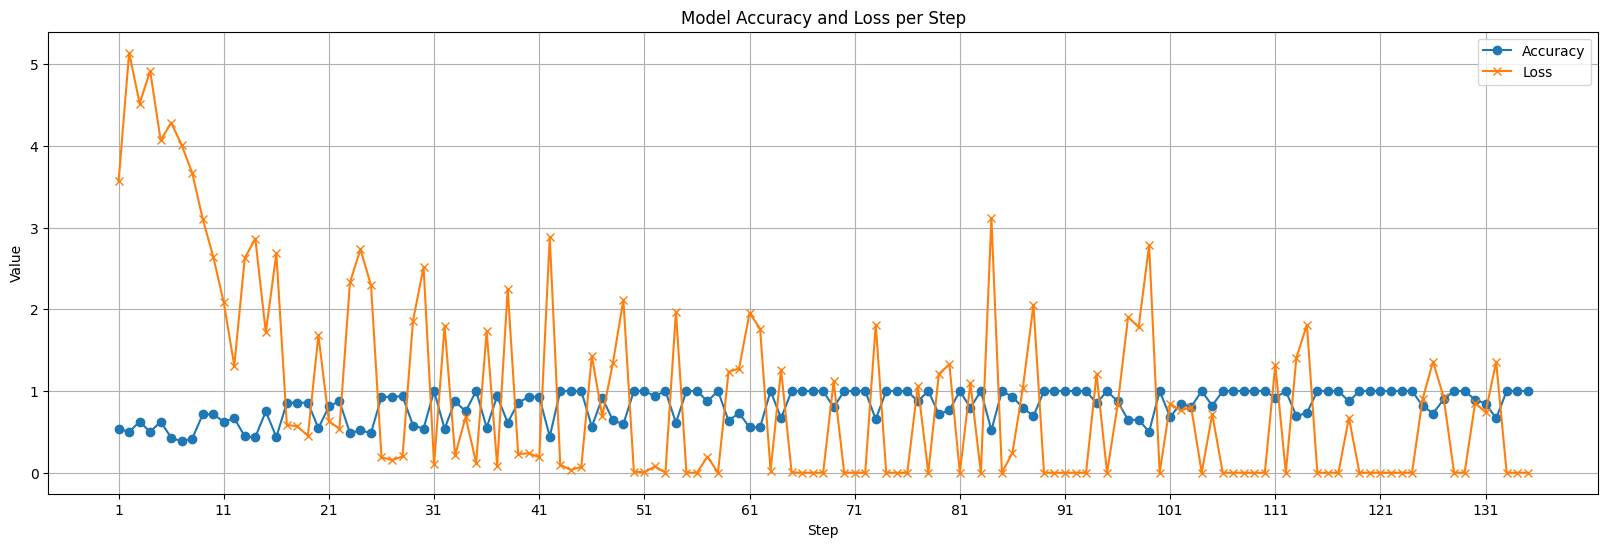

In [11]:


steps = list(metrices['step'])
accuracy = list(metrices['train_accuracy'])
loss = list(metrices['train_loss'])
plt.figure(figsize=(20, 6))


plt.plot(steps, accuracy, label='Accuracy',  marker='o')
plt.plot(steps, loss, label='Loss', marker='x')


plt.title('Model Accuracy and Loss per Step')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(range(1, len(steps)+1, 10))
plt.legend()
plt.show()


## Analysing Output from inference models

In [12]:
data_path = "fine-tuned-gpt-inference.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    results = [json.loads(line) for line in f]

In [13]:
results

['{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}',
 '{"Grade": 100, "Feedback": Nice work}']

In [14]:
data_path = "gpt_4_inference.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    results_gpt_4 = [json.loads(line) for line in f]

In [15]:
results_gpt_4

["Grade: 95\n\nThe student has done a good job in following the instructions. They have used a machine learning model (Random Forest) to predict whether it will rain or not. They have also used VectorAssembler for feature transformation. The code is well-structured and the logic is correct. \n\nHowever, the student has not provided any comments or explanations about the steps they are performing, which makes it a bit difficult to follow the logic. It would be better if they could provide some explanations or comments in their code. \n\nThe student could also improve their work by performing some exploratory data analysis before building the model. This would give them a better understanding of the data and could potentially improve the model's performance. \n\nFinally, the student could try using different machine learning models and compare their performance. This would give them a better understanding of which model works best for this particular problem.",
 'Grade: 95\n\nThe assignm

### Comparing grades

In [16]:
import re

results_gpt_3_grade = []
for feedback in results:
    overall_grade = grade_search = re.search(r'"Grade": (\d+)',feedback)
    results_gpt_3_grade.append(int(overall_grade.group(1)))

In [17]:
results_gpt_3_grade

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [18]:


results_gpt_4_grade = []
for feedback in results_gpt_4:
    overall_grade = re.search(r"Grade: (\d+)", feedback)
    results_gpt_4_grade.append(int(overall_grade.group(1)))

In [19]:
results_gpt_4_grade

[95, 95, 70, 95, 95, 95, 95, 95, 95, 95]

In [7]:
human_evaluation = pd.read_csv("/Users/shobanasiranjeevilu/Downloads/sample_work/sample_work/inference/human_evaluation.csv")

In [21]:
human_grades = list(human_evaluation['Value'])

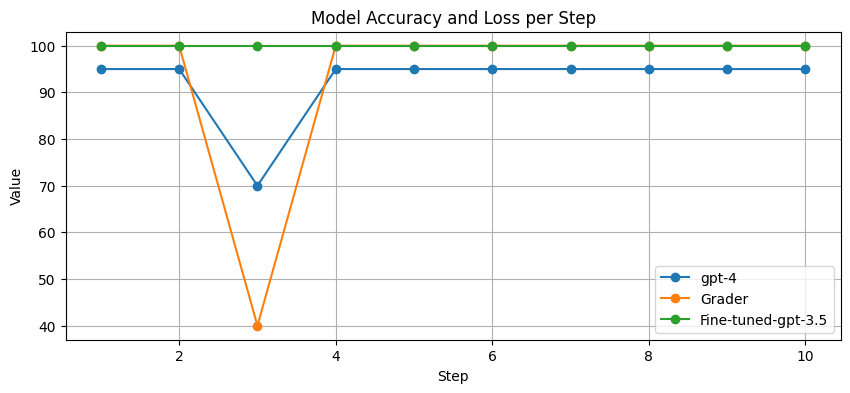

In [22]:
examples = range(1, len(results_gpt_4_grade)+1)


plt.figure(figsize=(10, 4))


plt.plot(examples, results_gpt_4_grade, label='gpt-4',  marker='o')
plt.plot(examples, human_grades, label='Grader',  marker='o')
plt.plot(examples, results_gpt_3_grade, label='Fine-tuned-gpt-3.5',  marker='o')


plt.title('Model Accuracy and Loss per Step')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()

### Calcualting rouge for feedback 

In [8]:
results_gpt_4_feedback = [

"The student has done a good job in following the instructions. They have used a machine learning model (Random Forest) to predict whether it will rain or not. They have also used VectorAssembler for feature transformation. The code is well-structured and the logic is correct. \n\nHowever, the student has not provided any comments or explanations about the steps they are performing, which makes it a bit difficult to follow the logic. It would be better if they could provide some explanations or comments in their code. \n\nThe student could also improve their work by performing some exploratory data analysis before building the model. This would give them a better understanding of the data and could potentially improve the model's performance. \n\nFinally, the student could try using different machine learning models and compare their performance. This would give them a better understanding of which model works best for this particular problem."
,"The assignment is almost perfect. The student has successfully used multiple machine learning models to predict rain, including RandomForestClassifier, DecisionTreeClassifier, GBTClassifier, and LogisticRegression. The VectorAssembler was also used effectively to perform feature transformation. \n\nThe student has also evaluated the models using the AUC-ROC metric and RMSE, which is a good practice. \n\nHowever, the student could improve the assignment by handling missing values more effectively. Currently, the student is filling missing values with 0, which might not be the best strategy for all columns. It would be better to use a more sophisticated method for handling missing values, such as imputation. \n\nAdditionally, the student could improve the assignment by performing some exploratory data analysis before building the models. This would provide valuable insights about the data and could potentially improve the performance of the models. \n\nFinally, the student could improve the assignment by tuning the hyperparameters of the models. This could potentially improve the performance of the models. \n\nOverall, the student has done a great job on this assignment. The code is well-organized and easy to follow, and the student has demonstrated a good understanding of machine learning and PySpark."
,"summarized Feedback: The student has not used any ML model to perform prediction."
,"The assignment is almost perfect. The student has successfully used a machine learning model (Random Forest Classifier) to predict whether it will rain tomorrow in Australia. The student has also successfully used VectorAssembler to perform feature transformation. The student has also done a good job in handling missing values and balancing the dataset.\n\nHowever, the student has not provided any explanation or comments in the code to explain what each part of the code does. This makes it difficult for others to understand the code. Also, the student has not provided any analysis or interpretation of the results. For example, the student could have discussed the accuracy of the model and whether it is satisfactory.\n\nReasoning:\n\n- The student has successfully used a machine learning model to perform prediction, as required by the assignment.\n- The student has successfully used VectorAssembler to perform feature transformation, as required by the assignment.\n- The student has handled missing values and balanced the dataset, which are good practices in machine learning.\n- The student has not provided any explanation or comments in the code, which makes it difficult for others to understand the code.\n- The student has not provided any analysis or interpretation of the results, which is an important part of any data analysis project."
,"The assignment is almost perfect. The student has successfully used a machine learning model (Logistic Regression) to predict rain in Australia. The student has also successfully used VectorAssembler to perform feature transformation. The student has also done a good job in handling missing values in the dataset. \n\nHowever, there are a few minor issues that need to be addressed:\n\n1. The student has dropped the \"selected_numerical_features\" column from the dataframe, which is not necessary and could potentially lead to errors since this column does not exist in the dataframe. \n\n2. The student has not provided any explanation or comments in the code, which makes it difficult to understand the logic and flow of the code. \n\n3. The student has not visualized the data or the results, which is an important part of any data analysis task. \n\n4. The student has not split the data into training and testing sets, which is a crucial step in any machine learning task. \n\nOverall, the student has done a good job, but there is room for improvement."
,"The code provided is well-structured and follows the instructions given in the assignment. The student has used a Machine Learning model (Decision Tree Classifier) to predict whether it will rain tomorrow in Australia based on weather data. The student has also successfully used VectorAssembler to perform feature transformation, which is a requirement in the assignment.\n\nHowever, the student has not provided any output for the code, so it's not possible to verify if the code runs successfully and produces the expected results. Therefore, I have deducted 5 points. \n\nIn the future, please provide the output of your code or a link to a notebook where the code has been run. This will allow for a more accurate evaluation of your work."
,"The assignment is almost perfect. The student successfully loaded the dataset, preprocessed the data (handled missing values, converted categorical variables to numerical), split the data into training and testing sets, trained a Random Forest model, made predictions, and evaluated the model using accuracy. \n\nHowever, the assignment lacks the use of VectorAssembler for feature transformation as per the instructions. VectorAssembler is a feature transformer that merges multiple columns into a vector column. It's commonly used in PySpark's MLlib library, not in scikit-learn. The student might have misunderstood the instructions or the context. \n\nFeedback: \n1. The assignment is well done, but it lacks the use of VectorAssembler for feature transformation. Please make sure to follow all the instructions.\n2. It's good to see that you've handled missing values and categorical variables before training the model. This is a crucial step in any machine learning project.\n3. Your model evaluation using accuracy is correct. However, consider using other metrics like precision, recall, or F1 score for a more comprehensive evaluation, especially for imbalanced datasets.\n4. Keep up the good work!"
,"The code provided does a good job of following the instructions. It uses a machine learning model (Random Forest Classifier) to predict whether it will rain tomorrow in Australia based on weather data. It also successfully uses the VectorAssembler to perform feature transformation. \n\nHowever, there are a few areas where the code could be improved:\n\n1. The handling of missing values could be more sophisticated. Simply replacing all missing values with 0 may not be the best approach, especially for numerical columns. It would be better to use a method that takes into account the distribution of the data, such as mean or median imputation.\n\n2. The code does not include any exploratory data analysis or visualization. While this was not explicitly required in the instructions, it is generally a good practice to include this in a data science project.\n\n3. The code does not include any comments explaining what each section of the code does. This makes it harder for others to understand the code.\n\n4. The code does not include any evaluation of the model beyond a simple accuracy score. It would be helpful to include other metrics, such as precision, recall, and F1 score, as well as a confusion matrix. \n\n5. The code does not include any hyperparameter tuning or cross-validation. This could potentially improve the performance of the model. \n\nOverall, the code does a good job of following the instructions and should be able to make accurate predictions. However, there are several areas where the code could be improved."
,"The assignment is almost perfect. The student has successfully used a machine learning model (LinearSVC and RandomForestClassifier) to predict rain and has also included VectorAssembler to perform feature transformation. The code is well-structured and easy to follow. The student has also done a good job in data preprocessing and feature engineering.\n\nHowever, there are a few areas that could be improved:\n\n1. The student could have provided more explanation or comments in the code to make it easier to understand what each block of code is doing.\n2. The student could have visualized the data or the results to make the analysis more comprehensive.\n3. The student could have tried more models or techniques to improve the prediction accuracy.\n\nOverall, the student has done a good job in this assignment. The student has demonstrated a good understanding of machine learning and PySpark."
,"The assignment is almost perfect. The student has successfully used a machine learning model (Logistic Regression) to predict rain in Australia. The student has also successfully included VectorAssembler to perform feature transformation. The student has shown a good understanding of data preprocessing, feature engineering, and model evaluation. \n\nHowever, there are a few areas that could be improved:\n\n1. The student could have tried more than one machine learning model for the prediction task. This would have allowed for a comparison of the performance of different models on the same task.\n\n2. The student could have performed some exploratory data analysis (EDA) before building the model. This would have provided insights into the data and could have informed the feature engineering process.\n\n3. The student could have explained the steps and the code more clearly. While the code is well-structured and well-commented, a brief explanation of the steps and the reasoning behind them would have been helpful.\n\n4. The student could have visualized the results of the model evaluation. Visualizations can make the results more understandable and can provide insights that are not immediately obvious from the raw numbers.\n\nOverall, the assignment is very good and shows a strong understanding of machine learning and data processing with PySpark. The student just needs to work on the areas mentioned above to make it perfect."

]

In [9]:
results_gpt_3_feedback = [
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work",
    "Nice work"

]

In [10]:
human_feedback = list(human_evaluation['Feedback to Learner'])

In [11]:
from rouge import Rouge 
rouge = Rouge()


for i in range(len(results_gpt_4_feedback)):
    scores = rouge.get_scores(results_gpt_4_feedback[i], human_feedback[i])
    print(scores)


[{'rouge-1': {'r': 0.5, 'p': 0.011111111111111112, 'f': 0.021739130009451806}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.5, 'p': 0.011111111111111112, 'f': 0.021739130009451806}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
[{'rouge-1': {'r': 0.09090909090909091, 'p': 0.07692307692307693, 'f': 0.08333332836805586}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.09090909090909091, 'p': 0.07692307692307693, 'f': 0.08333332836805586}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0},

In [12]:

for i in range(len(results_gpt_3_feedback)):
    scores = rouge.get_scores(results_gpt_3_feedback[i], human_feedback[i])
    print(scores)


[{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]
[{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]
[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
[{'rouge-1': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}}]
[{'rouge-1': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}}]
[{'rouge-1': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}}]
[{'rouge-1': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-2':